# Do Netflix subscribers prefer older or newer movies?

https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby

In [5]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set;

In [9]:
# Import data and check out head of DataFrame
df = pd.read_excel('/Users/astrid/Documents/Machine_learning/netflix/netflix.xlsx')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [10]:
# Check out info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [39]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True) # or I can use df = df.dropna()
df.drop_duplicates(inplace=True)
df.head() # as we have drop some rows the index of df now is not consecutive

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80


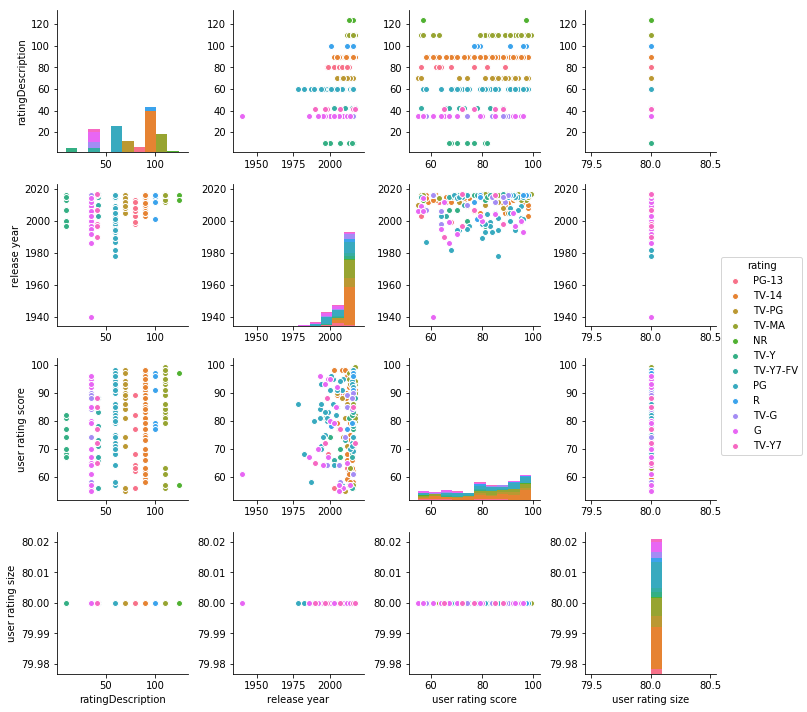

In [40]:
# Visualize pairplot of df
sns.pairplot(df, hue='rating'); # it plots the numeric variables (int64 (ratingDescription,release year,user rating size) and float 64(user rating score))
# the result are plots(4x4 matrix of plots) of each variable as a function of one of the other variables
# the plots in the diagonal of the matrix represent each variable as a function of itself

In [14]:
# Get summary stats of df
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


# Groupbys and split-apply-combine to answer the question

Step 1. Split

In [15]:
# Group by year
df_by_year = df.groupby(['release year'])

In [17]:
# Check type of GroupBy object
type(df_by_year)

pandas.core.groupby.DataFrameGroupBy

Step 2. Apply

In [37]:
# you're applying the .describe() method to each group in the groupby

# Summary stats over years
df_by_year.describe().head(18)

ratingDescription                                           \
                         count       mean        std   min    25%   50%   
release year                                                              
1940                       1.0  35.000000        NaN  35.0  35.00  35.0   
1978                       1.0  60.000000        NaN  60.0  60.00  60.0   
1982                       1.0  60.000000        NaN  60.0  60.00  60.0   
1986                       1.0  35.000000        NaN  35.0  35.00  35.0   
1987                       1.0  60.000000        NaN  60.0  60.00  60.0   
1989                       1.0  60.000000        NaN  60.0  60.00  60.0   
1990                       1.0  41.000000        NaN  41.0  41.00  41.0   
1992                       1.0  35.000000        NaN  35.0  35.00  35.0   
1993                       3.0  51.666667  14.433757  35.0  47.50  60.0   
1994                       4.0  60.000000   0.000000  60.0  60.00  60.0   
1995                       2.0  47.500000  17.677670  35.0  41.25  47.5   
1997                       5.0  41.200000  20.729206  10.0  35.00  41.0   
1998                       5.0  55.200000  17.824141  35.0  41.00  60.0   
1999                       4.0  52.500000  21.794495  35.0  35.00  47.5   
2000                       4.0  35.000000  20.412415  10.0  28.75  35.0   
2001                       2.0  80.000000  28.284271  60.0  70.00  80.0   
2002                       2.0  60.000000   0.000000  60.0  60.00  60.0   
2003                       5.0  61.400000  23.660093  35.0  42.00  60.0   

                           user rating score         ...                \
                75%    max             count   mean  ...     75%   max   
release year                                         ...                 
1940          35.00   35.0               1.0  61.00  ...   61.00  61.0   
1978          60.00   60.0               1.0  86.00  ...   86.00  86.0   
1982          60.00   60.0               1.0  68.00  ...   68.00  68.0   
1986          35.00   35.0               1.0  67.00  ...   67.00  67.0   
1987          60.00   60.0               1.0  58.00  ...   58.00  58.0   
1989          60.00   60.0               1.0  80.00  ...   80.00  80.0   
1990          41.00   41.0               1.0  65.00  ...   65.00  65.0   
1992          35.00   35.0               1.0  70.00  ...   70.00  70.0   
1993          60.00   60.0               3.0  87.00  ...   90.00  96.0   
1994          60.00   60.0               4.0  80.00  ...   87.75  93.0   
1995          53.75   60.0               2.0  69.00  ...   71.50  74.0   
1997          60.00   60.0               5.0  80.80  ...   83.00  93.0   
1998          60.00   80.0               5.0  79.00  ...   82.00  88.0   
1999          65.00   80.0               4.0  78.25  ...   86.00  95.0   
2000          41.25   60.0               4.0  85.00  ...   92.00  95.0   
2001          90.00  100.0               2.0  87.00  ...   91.50  96.0   
2002          60.00   60.0               2.0  90.50  ...   92.75  95.0   
2003          80.00   90.0               5.0  72.60  ...   79.00  98.0   

             user rating size                                           
                        count  mean  std   min   25%   50%   75%   max  
release year                                                            
1940                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1978                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1982                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1986                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1987                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1989                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1990                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1992                      1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0  
1993                      3.0  80.0  0.0  80.0  80.0  80.0  80.0  80.0  
1994  

In [34]:
# Cast grouping as a list and check out one year
list(df_by_year)[17]

(2003,                             title    rating  \
 64                        Friends     TV-14   
 253  How to Lose a Guy in 10 Days     PG-13   
 515                Justice League  TV-Y7-FV   
 657         Spy Kids 3: Game Over        PG   
 917       Atlantis: Milo's Return         G   
 
                                            ratingLevel  ratingDescription  \
 64   Parents strongly cautioned. May be unsuitable ...                 90   
 253                          some sex-related material                 80   
 515  Suitable for children ages 7 and older.  Conte...                 42   
 657                         action sequences and peril                 60   
 917          General Audiences. Suitable for all ages.                 35   
 
      release year  user rating score  user rating size  
 64           2003               98.0                80  
 253          2003               56.0                80  
 515          2003               66.0                80  
 6

Step 3. Combine

Let's say that you wanted the mean or median user_rating_score for each year. Then you can apply the .mean() or .median() method, respectively, to the groupby object and 'combine' these into a new DataFrame.

In [38]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


The index of df_med_by_year consists of the values in the original column that you grouped by, the years from release_year:

In [42]:
# Print index
print(df_med_by_year.index)

Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


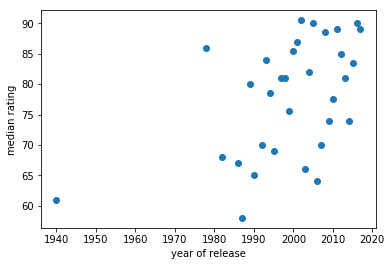

In [44]:
# Slice out user rating and plot
df_rate_by_year = df_med_by_year['user rating score']
plt.scatter(df_rate_by_year.index, df_rate_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');